In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
dataset = pd.read_csv('C:/Users/WIN/Downloads/Comcast_telecom_complaints_data.csv')
dataset

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [3]:
# Obtaining date/month/years sepratly
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day

In [4]:
# droping Ticket, Zipcode, Time
dataset.drop(["Ticket #", "Time","Zip code","Date"], axis = 1, inplace = True)
dataset

,Customer Complaint,Date_month_year,Received Via,City,State,Status,Filing on Behalf of Someone,year,month,day
0,Comcast Cable Internet Speeds,22-Apr-15,Customer Care Call,Abingdon,Maryland,Closed,No,2015,4,22
1,Payment disappear - service got disconnected,04-Aug-15,Internet,Acworth,Georgia,Closed,No,2015,4,8
2,Speed and Service,18-Apr-15,Internet,Acworth,Georgia,Closed,Yes,2015,4,18
3,Comcast Imposed a New Usage Cap of 300GB that ...,05-Jul-15,Internet,Acworth,Georgia,Open,Yes,2015,5,7
4,Comcast not working and no service to boot,26-May-15,Internet,Acworth,Georgia,Solved,No,2015,5,26
...,...,...,...,...,...,...,...,...,...,...
2219,Service Availability,04-Feb-15,Customer Care Call,Youngstown,Florida,Closed,No,2015,4,2
2220,Comcast Monthly Billing for Returned Modem,06-Feb-15,Customer Care Call,Ypsilanti,Michigan,Solved,No,2015,6,2
2221,complaint about comcast,06-Sep-15,Internet,Ypsilanti,Michigan,Solved,No,2015,6,9
2222,Extremely unsatisfied Comcast customer,23-Jun-15,Customer Care Call,Ypsilanti,Michigan,Solved,No,2015,6,23


### 2] Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [5]:
# obtaining number of complaints on monthly and daily basis
comp_per_month = dataset['month'].value_counts()
comp_per_month

6    1280
4     545
5     399
Name: month, dtype: int64

##### Output is clearly shows that June month has highest number of complaints lodge with 1280 numbers

In [6]:
comp_per_day = dataset['day'].value_counts()
comp_per_day

24    249
23    225
25    126
26     90
29     87
30     86
27     81
28     79
18     69
13     68
8      67
22     66
12     65
16     65
17     60
2      59
15     58
1      55
9      55
14     54
10     53
20     51
19     50
5      49
7      49
3      45
21     41
11     38
6      38
4      36
31     10
Name: day, dtype: int64

Text(0.5, 1.0, 'MONTHLY GRANULARITY LEVELS')

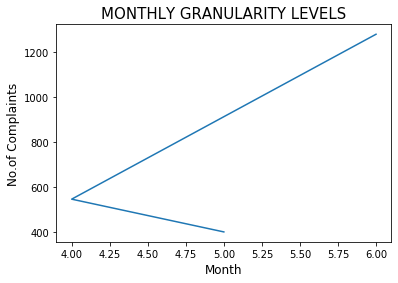

In [7]:
plt.plot(comp_per_month)
plt.xlabel("Month", fontsize=12)
plt.ylabel("No.of Complaints", fontsize=12)
plt.title("MONTHLY GRANULARITY LEVELS", fontsize=15)

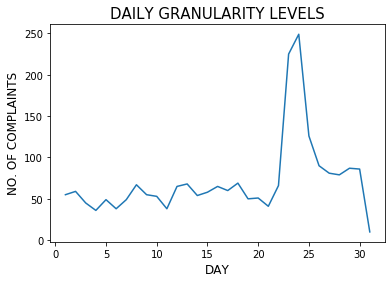

In [8]:
sns.lineplot( data = comp_per_day)
plt.title('DAILY GRANULARITY LEVELS', fontsize=15)
plt.xlabel('DAY', fontsize=12)
plt.ylabel('NO. OF COMPLAINTS', fontsize=12)
plt.show()

### 3] Frequency table of Lodge Complaints

In [9]:
dataset['Customer Complaint'] = dataset['Customer Complaint'].str.title()
dataset['Customer Complaint']

0                           Comcast Cable Internet Speeds
1            Payment Disappear - Service Got Disconnected
2                                       Speed And Service
3       Comcast Imposed A New Usage Cap Of 300Gb That ...
4              Comcast Not Working And No Service To Boot
                              ...                        
2219                                 Service Availability
2220           Comcast Monthly Billing For Returned Modem
2221                              Complaint About Comcast
2222               Extremely Unsatisfied Comcast Customer
2223                 Comcast, Ypsilanti Mi Internet Speed
Name: Customer Complaint, Length: 2224, dtype: object

In [10]:
Complaints = dataset["Customer Complaint"].value_counts()
Complaints

Comcast                                                        102
Comcast Data Cap                                                30
Comcast Internet                                                29
Comcast Data Caps                                               21
Comcast Billing                                                 18
                                                              ... 
Pricing Concerns                                                 1
Comcast Lies To The Customer Just To Get Them Off The Phone      1
Cocmast (Internet)                                               1
Consistently Slow And Throttled Internet Speeds                  1
Comcast Overbilled Me And Added Numerous Hidden Charges          1
Name: Customer Complaint, Length: 1740, dtype: int64

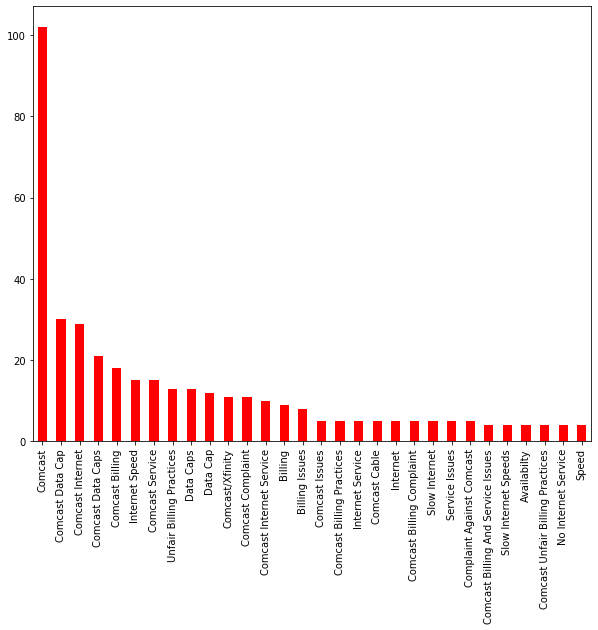

In [22]:
Complaints[:30].plot(kind='bar',figsize=(10,8),stacked=True,color="red")

#### Insight:-
#####        - As shown in chart it is clearly shows that Comcast , Comcast Data Cap &  Comcast Internet is highest type of complaints. 

### 4] Which complaint types are maximum & Which State has lodge maximum complaints

In [12]:
print(" The maximum lodge complaint is : ", dataset.iloc[ : ,0].value_counts().idxmax())
print(" The State that has lodge Max Number of complaint is : ", dataset.iloc[ : ,4].value_counts().idxmax())

 The maximum lodge complaint is :  Comcast
 The State that has lodge Max Number of complaint is :  Georgia


### 5] Create a new categorical variable with value as Open and Closed
###### -(Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed)

In [13]:
dataset['finalstatus'] = ["Open" if status=="Open" or status=="Pending" else "Closed" for status in dataset['Status']]
dataset.head()

,Customer Complaint,Date_month_year,Received Via,City,State,Status,Filing on Behalf of Someone,year,month,day,finalstatus
0,Comcast Cable Internet Speeds,22-Apr-15,Customer Care Call,Abingdon,Maryland,Closed,No,2015,4,22,Closed
1,Payment Disappear - Service Got Disconnected,04-Aug-15,Internet,Acworth,Georgia,Closed,No,2015,4,8,Closed
2,Speed And Service,18-Apr-15,Internet,Acworth,Georgia,Closed,Yes,2015,4,18,Closed
3,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-Jul-15,Internet,Acworth,Georgia,Open,Yes,2015,5,7,Open
4,Comcast Not Working And No Service To Boot,26-May-15,Internet,Acworth,Georgia,Solved,No,2015,5,26,Closed


### 6] Provide state wise status of complaints in a stacked bar chart

In [23]:
dataset["State"] = dataset['State'].str.title()
state_complaint = dataset.groupby(["State","finalstatus"]).size().unstack().fillna(0)
state_complaint.head()

finalstatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


##### Provide state wise status of complaints in a stacked bar chart

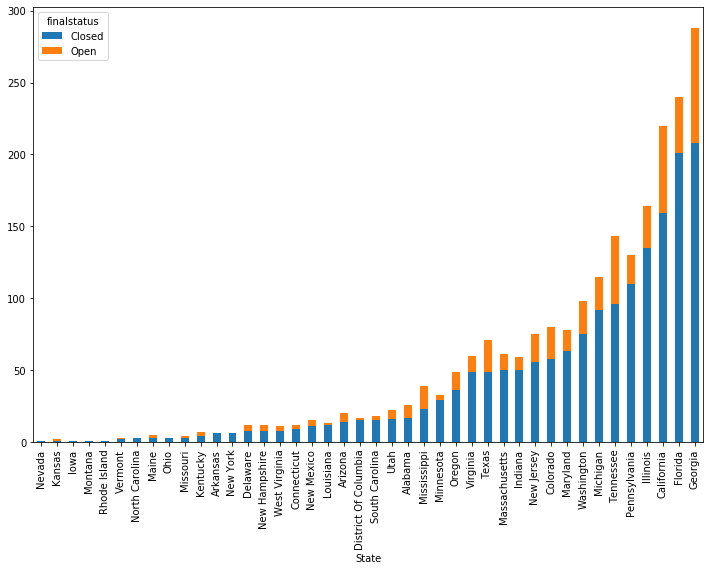

In [15]:
comp = state_complaint.sort_values("Closed", ascending=True, axis=0)
comp.plot(kind="bar",figsize=(12,8),stacked=True)

#### Insight:-
#####        - As shown in graph Georgia, Florida, California These are few state which has highest no of complaints also maximum no. of complaints resolved

### 7] Which state has the highest percentage of unresolved complaints

In [16]:
state_complaint["Percentage"] = (state_complaint["Open"]/(state_complaint["Closed"]+state_complaint["Open"])*100)
state_complaint

finalstatus,Closed,Open,Percentage
State,,,
Alabama,17.0,9.0,34.615385
Arizona,14.0,6.0,30.000000
Arkansas,6.0,0.0,0.000000
California,159.0,61.0,27.727273
Colorado,58.0,22.0,27.500000
Connecticut,9.0,3.0,25.000000
Delaware,8.0,4.0,33.333333
District Of Columbia,15.0,2.0,11.764706
Florida,201.0,39.0,16.250000


In [17]:
print('The State which has highest percentage of unresolved complaints is:',state_complaint["Percentage"].idxmax())

The State which has highest percentage of unresolved complaints is: Kansas


##### The City which has more no. of unresolved complaints

In [18]:
print('The State which has maximum no. of unresolved complaints is:',state_complaint.idxmax())

The State which has maximum no. of unresolved complaints is: finalstatus
Closed        Georgia
Open          Georgia
Percentage     Kansas
dtype: object


#### Insight :-
##### --The State which has maximum no. of unresolved complaints is Georgia - Out of total 288 complaints 208 is closed & 80 is Open
##### --The State which has highest percentage of unresolved complaints is Kansas - Out of total 2 complaints 1 is closed & 1 is Open which is 50%


### 8] Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls

In [19]:
a=dataset.groupby(["Received Via", "finalstatus"]).size().unstack().fillna(0)
a

finalstatus,Closed,Open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [20]:
print("The total Complaints :", a["Closed"] + a["Open"] )

The total Complaints : Received Via
Customer Care Call    1119
Internet              1105
dtype: int64


In [21]:
print("The percentage of complaints resolved :" , (a["Closed"]/(a["Closed"]+a["Open"]))*100)

The percentage of complaints resolved : Received Via
Customer Care Call    77.211796
Internet              76.289593
dtype: float64


#### Insight :-
#####          - Total no. complaints resolved received Via Cusomer Care Call is 77.21%
#####          -- Total no. complaints resolved received Via Internet is 76.28%